<h3>Research Question Context</h3>
<p>Fraud monitoring and prevention are the most challenging and costly financial businesses. For example, in 2018, $24.26 Billion was lost due to payment card fraud. Banks and financial houses try to reduce fraud by investing much money in software development. The United States leads as the most credit fraud-prone country, with 38.6% of reported card fraud losses in 2018. (Shiftprocessing, 2022)
Analyzing the features of the transactions using machine learning like the logistic regression model could statistically significantly identify the fraudulent transactions, and the study results could be used as proof of concept to develop applications in the future for fraud monitoring and prevention.  
<p>Newly released Federal Trade Commission data shows that consumers reported losing more than $5.8 billion to fraud in 2021, an increase of more than 70 percent over the previous year.
(FTC.gov 2022)
<p>Machine learning can be a powerful and influential tool in one of the most challenging and restricted sectors and will drive to increasing the trust for more safe transactions and more financial revenue.

<h3>Research Question</h3>
<p>The Financial houses and Banks are still looking for tools to monitor and prevent fraud, and at the same time looking to measure the accuracy, efficiency, and effectiveness that could be summarized in one research question: "To what extent can transactions be identified as a fraud?"


<h3>Justification</h3>
<p>The research question covers the financial houses’ and banks' actual needs and determines if the transactions could identify as fraud. This research question covers both requirements: the ability and accuracy of the same question.
The research results that will answer the research question will provide the details that will help the decision-maker use the research model as a proof of concept.
The research question presents the opportunity to the data analytics and data researcher to compare the results, like comparing the predicted data with the test data to define if the model can identify the fraudulent transactions and to what extent.

<h3>Hypothesis</h3>
<p>The research hypothesis will be: "Fraudulent transactions can statistically significantly be identified from the provided dataset."
The research will evaluate if it can statistically significantly identify fraud transactions. The evidence will be collected to confirm or reject the hypothesis from the logistic regression model as one of the machine learning models. The model evaluation will determine if the thesis can be validated or rejected.

<h3>Data Collection</h3>
<h5>Data Description</h5>
<p>
Finding a dataset for the historical financial transactions was not easy, including the necessity to answer the research question; any data related to the financial sector is hard to find. The dataset must include enough transactions to train and test the model.
Some of the included transactions must be classified as fraud to be healthy data for training the model. The transaction features should identify the fraud transaction characteristics and properties and include a dependent variable that will train the model by labeling or classifying the fraud or non-fraud transactions.
The research will use a dataset in a CSV file format named "Fraud Detection Classification" downloaded from Kaggle.com, covering all needed requirements.
The dataset is available to the public, does not include any restriction data, includes 101613 transactions(rows) and ten columns. The dataset is a sample and an excellent example of answering the research question and analyzing the transactions. (Kaggle, 2022)</p>

<p>The dataset display “Cash Out” and “Transfer” are only transaction types in the fraud scope.</p>
<h5>Advantage and Disadvantage of the used methodology</h5>
<p>The advantage of looking for datasets and working with public data allows the data scientist to find a non-restricted dataset and data like what they need to use in the initial research studies, build models, and improve the ability to increase the learning curve and build a proof of concepts. It will help to answer the research questions before using a restricted dataset whet requires authorization to use.
<p>The Disadvantage is the leak of control, the limited number of available variables, and the number of observations in the dataset. Maybe regarding the domain business, the financial sector is confidential, which causes fewer variables and observations. Furthermore, working with an un-trusted dataset, which the researchers could use to build initial models, cannot entirely rely on it.
<h5>Challenges</h5>
<p>The challenges are related to finding, studying, understanding the data in a dataset that covers all the necessary to answer the research question. For example, to answer the research question, the dataset should include
<ul>
<li>Enough variables with types able to work with that types.</li>
<li>Enough number of observations.</li>
<li>The dependent variable will use as labels to classify the transactions.</li>
</ul>
<p>The variables’ names and descriptions were challenges to understand the business behind. 
<p>Finding an easy source like CSV to collect data from is a challenge, influential, and will reduce the time for the research project. 


In [1]:
!pip install -r requirements.txt

  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24277 sha256=4a7d6c0ef3af677b2bb98c29c1ed5f2b49ed852fb486ee42c8e5de9dbe29ff6c
  Stored in directory: c:\users\fadyy\appdata\local\pip\cache\wheels\64\d6\01\2701e2703a6fbd73f8b994044b8bf1b154cc7808bd1b88df49
Successfully built stats


In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML
import seaborn as sns
from scipy.stats import weibull_min
import matplotlib as mpl
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, \
precision_score, accuracy_score, recall_score, f1_score

C:\Users\fadyy\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\fadyy\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\fadyy\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


<h4>Data Preparation</h4>

In [3]:
# load the data set.
df = pd.read_csv(r"fraud_dataset_example.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,101613.000000,101613.0
mean,8.523457,1.740901e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06,0.001142,0.0
std,1.820681,3.450199e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06,0.033768,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.001659e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.338541e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04,0.000000,0.0
75%,10.000000,2.124984e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07,1.000000,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [6]:
df_after_drop = df.drop(['nameOrig','nameDest','isFlaggedFraud','step'], axis = 1)

In [7]:
# filter data
df_after_drop = df_after_drop[df_after_drop.type.isin(['TRANSFER','CASH_OUT'])]

In [8]:
display(df_after_drop.isnull().any())


type              False
amount            False
oldbalanceOrg     False
newbalanceOrig    False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
dtype: bool

In [9]:
df_after_dummies = pd.get_dummies(df_after_drop['type'])

In [10]:
df_after_dummies.head()

,CASH_OUT,TRANSFER
2,0,1
3,1,0
15,1,0
19,0,1
24,0,1


In [11]:
df_after_dummies = df_after_dummies.drop(['TRANSFER'], axis = 1)
df_after_dummies = df_after_dummies.astype(float)
df = pd.concat([df_after_dummies, df_after_drop], axis=1)
df = df.drop(['type'], axis = 1)
df.head()

,CASH_OUT,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,0.0,181.00,181.0,0.0,0.0,0.00,1
3,1.0,181.00,181.0,0.0,21182.0,0.00,1
15,1.0,229133.94,15325.0,0.0,5083.0,51513.44,0
19,0.0,215310.30,705.0,0.0,22425.0,0.00,0
24,0.0,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [12]:
df.describe()

,CASH_OUT,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,39999.000000,3.999900e+04,3.999900e+04,3.999900e+04,3.999900e+04,3.999900e+04,39999.000000
mean,0.782770,3.415713e+05,9.725422e+04,5.572949e+04,1.483995e+06,2.180107e+06,0.002900
std,0.412366,4.872281e+05,3.974548e+05,3.388937e+05,2.971902e+06,3.464998e+06,0.053775
min,0.000000,1.580000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.000000,9.149671e+04,0.000000e+00,0.000000e+00,5.955050e+04,2.736863e+05,0.000000
50%,1.000000,1.952752e+05,7.000000e+00,0.000000e+00,4.010888e+05,9.234983e+05,0.000000
75%,1.000000,3.642478e+05,3.491356e+04,0.000000e+00,1.405626e+06,2.432076e+06,0.000000
max,1.000000,1.000000e+07,1.633313e+07,1.379606e+07,3.173869e+07,3.894623e+07,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39999 entries, 2 to 101612
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CASH_OUT        39999 non-null  float64
 1   amount          39999 non-null  float64
 2   oldbalanceOrg   39999 non-null  float64
 3   newbalanceOrig  39999 non-null  float64
 4   oldbalanceDest  39999 non-null  float64
 5   newbalanceDest  39999 non-null  float64
 6   isFraud         39999 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 2.4 MB


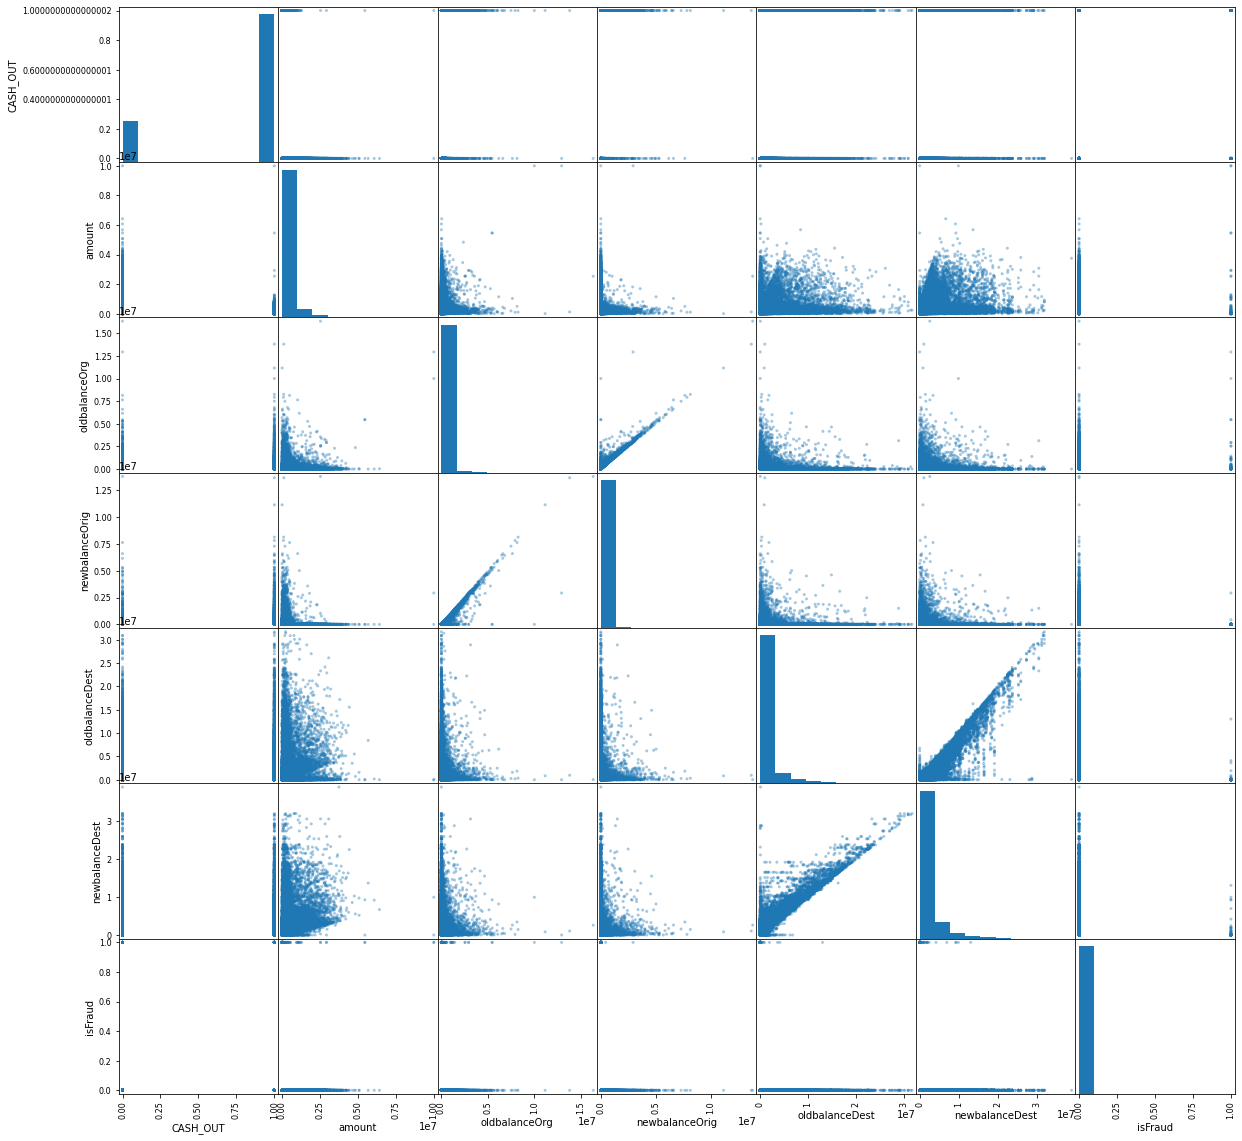

In [14]:
#The bivariate visualizations
scatter_matrix(df, alpha=0.4, figsize=(20, 20), diagonal='hist');
plt.show()

<h2>Analysis: Logistic Regression

In [15]:
#Initial Model.
y = df['isFraud']
x = df.drop(['isFraud'], axis = 1)
Xc = sm.add_constant(x)
logistic_regression = sm.Logit(y,Xc)
fitted_model = logistic_regression.fit()
fitted_model.summary()
print(fitted_model.summary())

Optimization terminated successfully.
         Current function value: 0.012565
         Iterations 18
                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:                39999
Model:                          Logit   Df Residuals:                    39992
Method:                           MLE   Df Model:                            6
Date:                Tue, 10 May 2022   Pseudo R-squ.:                  0.3667
Time:                        11:25:01   Log-Likelihood:                -502.59
converged:                       True   LL-Null:                       -793.62
Covariance Type:            nonrobust   LLR p-value:                1.725e-122
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.3331      0.179    -13.070      0.000      -2.683      -1.983
CASH_OUT        

,CASH_OUT,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
CASH_OUT,1.000000,-0.572691,-0.008074,0.030248,-0.115575,-0.205923
amount,-0.572691,1.000000,0.070470,-0.031659,0.169870,0.316745
oldbalanceOrg,-0.008074,0.070470,1.000000,0.937968,-0.002125,0.004655
newbalanceOrig,0.030248,-0.031659,0.937968,1.000000,-0.004798,-0.009822
oldbalanceDest,-0.115575,0.169870,-0.002125,-0.004798,1.000000,0.930920
newbalanceDest,-0.205923,0.316745,0.004655,-0.009822,0.930920,1.000000


<AxesSubplot:>

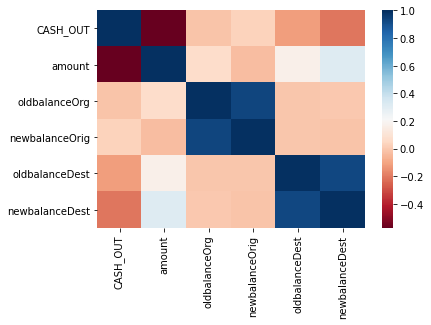

In [16]:
# calculate the correlation matrix
corr = x.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [17]:
# define two data frames one before the drop and one after the drop
Xc_before = Xc
Xc_after =  Xc.drop(['oldbalanceDest'], axis = 1)

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(Xc_before)
X2 = sm.tools.add_constant(Xc_after)

# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display the series
print('VIF before drop')
print('-'*100)
display(series_before)

print('VIF after drop')
print('-'*100)
display(series_after)


VIF before drop
----------------------------------------------------------------------------------------------------


const             9.677898
CASH_OUT          1.498805
amount            1.888247
oldbalanceOrg     9.162569
newbalanceOrig    9.110573
oldbalanceDest    8.627221
newbalanceDest    9.327418
dtype: float64

VIF after drop
----------------------------------------------------------------------------------------------------


const             9.667309
CASH_OUT          1.498301
amount            1.725966
oldbalanceOrg     9.157679
newbalanceOrig    9.106352
newbalanceDest    1.115937
dtype: float64

,const,CASH_OUT,amount,oldbalanceOrg,newbalanceOrig,newbalanceDest
const,NaN,NaN,NaN,NaN,NaN,NaN
CASH_OUT,NaN,1.000000,-0.572691,-0.008074,0.030248,-0.205923
amount,NaN,-0.572691,1.000000,0.070470,-0.031659,0.316745
oldbalanceOrg,NaN,-0.008074,0.070470,1.000000,0.937968,0.004655
newbalanceOrig,NaN,0.030248,-0.031659,0.937968,1.000000,-0.009822
newbalanceDest,NaN,-0.205923,0.316745,0.004655,-0.009822,1.000000


<AxesSubplot:>

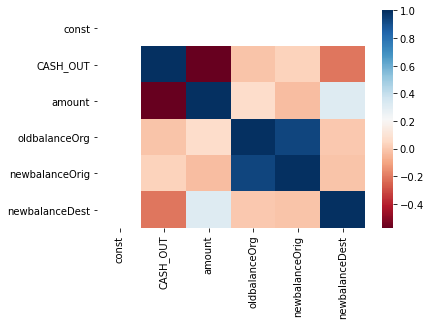

In [18]:
# calculate the correlation matrix after reduce
corr = Xc_after.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [19]:
# Final Model
logistic_regression = sm.Logit(y,Xc_after)
fitted_model = logistic_regression.fit()
fitted_model.summary()
print(fitted_model.summary())

Optimization terminated successfully.
         Current function value: 0.012567
         Iterations 21
                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:                39999
Model:                          Logit   Df Residuals:                    39993
Method:                           MLE   Df Model:                            5
Date:                Tue, 10 May 2022   Pseudo R-squ.:                  0.3666
Time:                        11:25:02   Log-Likelihood:                -502.68
converged:                       True   LL-Null:                       -793.62
Covariance Type:            nonrobust   LLR p-value:                1.658e-123
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.3348      0.179    -13.080      0.000      -2.685      -1.985
CASH_OUT        

In [20]:
#Cross-validation
X_train, X_test, y_train, y_test = train_test_split(Xc_after, y, test_size=0.20, random_state=210)

In [21]:
#Evaluation model
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_pred, y_test))

print('Accuracy Score: ' + str(accuracy_score(y_pred, y_test)))

print('Precision Score: ' + str(precision_score(y_pred, y_test)))

print('Recall Score: ' + str(recall_score(y_pred, y_test)))

print('F1-Score: ' + str(f1_score(y_pred, y_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7972
           1       0.83      0.54      0.65        28

    accuracy                           1.00      8000
   macro avg       0.92      0.77      0.83      8000
weighted avg       1.00      1.00      1.00      8000

Accuracy Score: 0.998
Precision Score: 0.8333333333333334
Recall Score: 0.5357142857142857
F1-Score: 0.6521739130434783


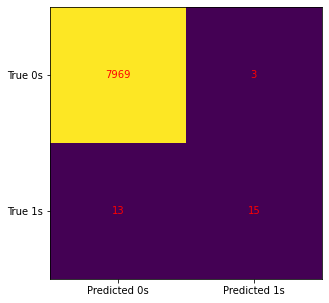

In [22]:
cm = confusion_matrix(y_pred, y_test)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('True 0s', 'True 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
        
plt.show()

<h2>Extra Machine Learning models outside the research

<h2>Random Forest

In [23]:
#Data Without reduce:
#Cross-validation work based on original selected columns
X_train, X_test, y_train, y_test = train_test_split(x, y, \
                                        test_size=0.20, random_state=210)

In [24]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
y_pred=clf.predict(X_test)
acc2 = accuracy_score(y_test, y_pred)
prec2 = precision_score(y_test, y_pred)
rec2 = recall_score(y_test, y_pred)
f12 = f1_score(y_test, y_pred)
print(classification_report(y_pred, y_test))
print('Accuracy:%0.4f'%acc2,'\nPrecision:%0.4f'%prec2, \
      '\nRecall:%0.4f'%rec2,'\nF1-score:%0.4f'%f12)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7989
           1       0.61      1.00      0.76        11

    accuracy                           1.00      8000
   macro avg       0.81      1.00      0.88      8000
weighted avg       1.00      1.00      1.00      8000

Accuracy:0.9991 
Precision:1.0000 
Recall:0.6111 
F1-score:0.7586


<h2>Decision Tree Classifer

In [26]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
dt= DecisionTreeClassifier()

# Train Decision Tree Classifer
dt = dt.fit(X_train, y_train)

In [27]:
#Predict the response for test dataset
y_pred_dt = dt.predict(X_test)

acc3 = accuracy_score(y_test, y_pred_dt)
prec3 = precision_score(y_test, y_pred_dt)
rec3 = recall_score(y_test, y_pred_dt)
f13 = f1_score(y_test, y_pred_dt)
print(classification_report(y_pred_dt, y_test))
print('Accuracy:%0.4f'%acc3,'\nPrecision:%0.4f'%prec3,'\nRecall:%0.4f'%rec3,\
      '\nF1-score:%0.4f'%f13)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7978
           1       0.72      0.59      0.65        22

    accuracy                           1.00      8000
   macro avg       0.86      0.80      0.82      8000
weighted avg       1.00      1.00      1.00      8000

Accuracy:0.9982 
Precision:0.5909 
Recall:0.7222 
F1-score:0.6500


In [28]:
import cloudpickle as cp

In [35]:
cp.dump(dt, open("DecisionTree.pkl", "wb"))
cp.dump(clf, open("RandomForestClassifier.pkl", "wb"))


In [30]:
exampleTran = { 'CASH_OUT': 0.0, 'amount': 181.0, 'oldbalanceOrg': 181.0, 'newbalanceOrig': 0.0, 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0 }  # fraud
exampleTran2 = { 'CASH_OUT': 1.0, 'amount': 229133.94, 'oldbalanceOrg': 15325.0, 'newbalanceOrig': 0.0, 'oldbalanceDest': 5083.0, 'newbalanceDest': 51513.44 }  # non-fraud

def isFraudTran(tran):
    df = pd.DataFrame(tran, index=[0])
    isFraud = dt.predict(df)[0]
    return { 'isFraud': isFraud }

In [31]:
isFraudTran(exampleTran)

{'isFraud': 1}

In [32]:
isFraudTran(exampleTran2)

{'isFraud': 0}

In [33]:
import json
from flask import Flask, jsonify, request
import pandas as pd
import cloudpickle as cp

# Load your model.
pipeline = cp.load(open('DecisionTree.pkl', 'rb'))


def isFraudTran(tran):
    df = pd.DataFrame(tran, index=[0])
    isFraud = pipeline.predict(df)[0]
    return str({ 'isFraud': isFraud })



tran = { 'CASH_OUT': 0.0, 'amount': 181.0, 'oldbalanceOrg': 181.0, 'newbalanceOrig': 0.0, 'oldbalanceDest': 0.0, 'newbalanceDest': 0.0 }
isFraudTran(tran)

"{'isFraud': 1}"

<h3>Summary of Implications</h3>
The data analysis succeeded in building a machine learning classification model using Logistic Regression and evaluation model to answer the research question "To what extent can transactions be identified as a fraud?" based on the current dataset.
The data analysis results rejected the research hypothesis "Fraudulent transactions can statistically significantly be identified from the provided dataset." based on the evaluation model evidence and the current dataset. 
The evaluation model results were around 99% Accuracy score as a general for all transactions. However, the other evidence, like Precision score, which represents the quality of model results, was 83%, Recall score, which represents the number of true positives, was 53%, and F1-score, which describes the model performance, was just 65%.
The model's low performance and quality are because of the low number of predicted fraud transactions, which the logistic regression model's success to predict as true positive. 
The results come less than Financial houses and Banks' expectations and acceptance levels. Financial transactions need more effective tools to monitor and prevent fraud, and the model is not an excellent practical tool to diagnose fraud transactions.


<h3>Limitation of Analysis</h3>
The major limitation of the data analysis is the data availability. For example, a current dataset has a limited number of transaction features, just ten columns, a limited number of rows of 101613 transactions. After filtering the data to select the transactions in the fraud scope, the number of rows reduces to 39999 rows and the limitate number of the actual fraud transactions in the dataset. It looks like more transaction features and actual fraud transactions in the dataset could improve the model performance and prediction quality.
Moreover, the Logistic Regression is a classic machine learning model and needs extra tools and techniques to handle issues like multicollinearity and overfitting.
Recommended Course of action
The data analysis results support doing more research using more data. More transactions rows, more transactions features, and more transactions flagged as fraud will help the model run multiple times with more different data, get more training, and improve the model performance and quality of predictions.
Compare the results with other classification machine learning models like Random Forest or Decision-Tree models. 
The financial houses and Banks looking for more effective and efficient solutions to monitor and prevent fraudulent transactions will not accept the current model performance and quality results.



<h3>Two Directions for the Future Study</h3>
The first direction is the most classic direction, which is related to the data analysis research nature and the current research, which is looking for more data to train and improve the model performance and quality. 
The data may be more transactions, and some flagged as fraud. More transaction features, usually the public data is just for prove concepts.
However, when the results support starting data analysis projects for business proposals, the chance to collect more data with more quality will be better. The project and research will become more productive if the data analyst can collect the data.

The second direction is to compare the results for the current research model with other classification machine learning models. Like the Random Forest and Decision-Tree, the different models include more enhancement to handle the common issues like multicollinearity and overfitting. Maybe the other models will be an excellent choice to perform the research, answer the research question, and confirm the hypothesis.
The current research code file includes an extra section to evaluate and compare the results with two different machine learning models. Random Forest and the Decision-Tree, both models, display better quality around 100% and better performance around 76%, could improve with more training by more data and meet the Financial houses and Banks acceptance.


<h3>Acknowledge sources:</h3>
Shiftprocessing. (Feb. 8, 2022). Fraud Statistics.  [Web Site].  Retrieved from
https://shiftprocessing.com/credit-card-fraud-statistics/

Kaggle.(Feb. 8, 2022). Fraud Detection Classification. [Web Site]. Retrieved from
https://www.kaggle.com/arditriana/fraud-detection-classification/data

Massaron, L., & Boschetti, A. (2016). Regression analysis with Python. Packet Publishing. ISBN: 9781785286315

Kite. (2021, June 10). Exploratory Data Analysis (EDA) and Data Visualization with Python. [Web Site].  Retrieved from
https://www.kite.com/blog/python/data-analysis-visualization-python/

Statology. (2021, June 24). Assumptions of Logistic Regression. [Web Site].  Retrieved from
https://www.statology.org/assumptions-of-logistic-regression/

ResearchGate. (2022, Feb 12). Convergence Failures in Logistic Regression. [Web Site].  Retrieved from https://www.researchgate.net/publication/228813245_Convergence_Failures_in_Logistic_Regression#:~:text=A%20frequent%20problem%20in%20estimating,estimates%20simply%20do%20not%20exist.

StackExchange. (2022, Feb 12). What correlation makes a matrix singular and the implications of singularity or near-singularity? [Web Site].  Retrieved from
https://stats.stackexchange.com/questions/70899/what-correlation-makes-a-matrix-singular-and-what-are-implications-of-singularit

StatisticsHowTo. (2022, Feb 12). What Variance Inflation Factor? [Web Site].  Retrieved from https://www.statisticshowto.com/variance-inflation-factor/

FTC.gov (2022, May 7) Fraud in 2021 [Web Site].  Retrieved from https://www.ftc.gov/news-events/news/press-releases/2022/02/new-data-shows-ftc-received-28-million-fraud-reports-consumers-2021-0)

